# **Use YOLO-cls !**

## 0.미션


### (1) 미션1
여러분은 노트북에서 얼굴 인식 파일을 실행시키기 위해 **문제에 적합한** UltraLytics YOLO-cls 모델을 만들어야 합니다.

그 전에 가지고 있는 데이터셋을 **학습에 적합한 형태**로 바꿔야 합니다.

- 1) 데이터셋을 불러옵니다.
    - 데이터셋은 2가지입니다. 본인의 얼굴 이미지 파일, 다른 사람의 얼굴 이미지 파일.
- 2) 데이터셋을 전처리합니다.
    - UltraLytics YOLO-cls 모델에서 요구하는 데이터셋 폴더의 구조가 있습니다.
    - [UltraLytics YOLO-cls 모델의 데이터셋 구조 링크](https://docs.ultralytics.com/datasets/classify/)

### (2) 미션2
데이터셋의 폴더 구조를 **학습에 적합한 형태**로 만들었다면, **사전 학습된 UltraLytics YOLO-cls 모델**에 Transfer Learning을 수행합니다.

- 1) UltraLytics YOLO-cls 모델 선택
    - 세부 모델로 n, s, m, l, x가 있습니다. n가 가장 빠르고, x가 가장 연산량이 많습니다.
    - [UltraLytics YOLO-cls 모델 링크](https://docs.ultralytics.com/tasks/classify/)
- 2) 선택한 UltraLytics YOLO-cls 모델로 학습을 진행합니다.
    - [UltraLytics YOLO 학습 명령어 링크](https://docs.ultralytics.com/modes/train/#train-settings)
- 3) 학습이 완료되면 추론을 진행합니다.
    - [UltraLytics YOLO 추론 명령어 링크](https://docs.ultralytics.com/modes/predict/#inference-arguments)
- 4) 해당 UltraLytics YOLO-cls 모델을 **반드시** 저장합니다.
    - 모델을 **반드시** 저장하세요.
    - .pt 형태로 Colab에 저장이 될 것입니다. 해당 파일을 **로컬에 다운로드** 하세요.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 구글콜랩
        * 구글 드라이브 바로 밑에 project4 폴더를 만드세요.
        * 데이터 파일을 복사해 넣습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

* 구글 드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
path = '/content/drive/MyDrive/kt/project_4'

### (2) 라이브러리 설치 및 불러오기

* 라이브러리 로딩

In [16]:
## colab에서 세션 재시작을 요구하는 팝업이 뜨면 재시작 누르세요.
!pip install ultralytics

## 2.미션1

여러분은 노트북에서 얼굴 인식 파일을 실행시키기 위해 **문제에 적합한** UltraLytics YOLO-cls 모델을 만들어야 합니다.

그 전에 가지고 있는 데이터셋을 **학습에 적합한 형태**로 바꿔야 합니다.

- 1) 데이터셋을 불러옵니다.
    - 데이터셋은 2가지입니다. 본인의 얼굴 이미지 파일, 다른 사람의 얼굴 이미지 파일.
- 2) 데이터셋을 전처리합니다.
    - UltraLytics YOLO-cls 모델에서 요구하는 데이터셋 폴더의 구조가 있습니다.
    - [UltraLytics YOLO-cls 모델의 데이터셋 구조 링크](https://docs.ultralytics.com/datasets/classify/)

### (1) 데이터셋 불러오기

* **세부 요구사항**
    - 데이터셋을 불러옵니다.
        - 데이터셋은 두 개의 압축 파일이어야 합니다.
            1. lfw-deepfunneled.zip : Labeled Faces in the Wild 데이터셋
                - 압축 파일을 로컬에 다운로드 받아서 **어떤 구조**인지 확인하세요.
            2. 여러분의 얼굴 이미지 데이터셋
                - 여러분의 얼굴 이미지가 담긴 **압축 파일**을 **Google Drive에 업로드** 하기를 권장합니다.
                    - 이미지 파일 하나하나 업로드 하면 시간이 오래 걸립니다.
    - 데이터셋 압축 파일을 **Colab에 폴더를 생성한 후 해제**하세요.
        - 데이터셋 폴더를 **본인 얼굴 폴더, LFW 폴더로 나누어** 생성하는 것을 권장합니다.
        - 만일 두 압축 파일을 하나의 폴더에 모두 해제하면 전처리가 더 까다로워질 것입니다.
    - 예시 코드에서 사용한 라이브러리
        - os, zipfile

#### 1) 본인 얼굴 이미지 데이터셋 불러오기

In [18]:
import os

In [21]:
import os
import shutil
from glob import glob

# 이미지가 있는 소스 폴더 경로 설정
source_folders = [
    '/content/drive/MyDrive/kt/project_4/augmented_images',
    '/content/drive/MyDrive/kt/project_4/my_face_2'
]

# 대상 폴더 경로 설정
target_folder = '/content/drive/MyDrive/kt/project_4/Datasets/Keras/datasets/me'

# 대상 폴더가 존재하지 않으면 생성
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# 각 소스 폴더의 모든 이미지 파일을 대상 폴더로 복사
for folder in source_folders:
    image_files = glob(os.path.join(folder, '*'))

    for img_file in image_files:
        # 이미지 파일을 대상 폴더로 복사 (중복 시 덮어쓰기)
        shutil.copy(img_file, target_folder)

print("모든 이미지를 me 폴더에 저장 완료")


모든 이미지를 me 폴더에 저장 완료


#### 2) 다른 얼굴 이미지 데이터셋 불러오기

In [30]:
import zipfile
import os

# ZIP 파일 경로 및 추출 대상 경로 설정
zip_file_path = '/content/drive/MyDrive/kt/project_4/Datasets/Keras/lfw-deepfunneled.zip'
target_folder = '/content/drive/MyDrive/kt/project_4/Datasets/Keras/datasets/not_me'

# ZIP 파일 열기 및 추출
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # 모든 파일 목록 얻기
    all_files = zip_ref.namelist()

    # 필요한 폴더 구조가 있는지 확인 후 대상 폴더 생성
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    # 이미지 파일(.jpg, .png) 추출 및 복사
    for file in all_files:
        if (file.endswith('.jpg') or file.endswith('.png')):
            # 이미지 파일을 not_me 폴더에 저장
            zip_ref.extract(file, target_folder)

print("모든 이미지를 not_me 폴더에 저장 완료")


모든 이미지를 not_me 폴더에 저장 완료


* **세부 요구사항**
    - 데이터셋을 전처리 합니다.
        - YOLO-cls 모델이 요구하는 폴더 구조를 만듭니다.
            1. Datasets라는 폴더를 생성합니다.
            2. Training set, Validation set, Test set(선택 사항) 각 데이터셋이 들어갈 폴더를 생성합니다.
            3. 각 데이터셋 폴더에 분류할 클래스의 이름을 가진 폴더를 생성합니다.
        - 폴더 구조에 맞게 데이터를 분배합니다.
    - 예시 코드에서 사용한 라이브러리
        - os, glob, random, shutil, numpy

#### 1) 모델이 요하는 구조의 폴더 생성

In [11]:
import os

#### 2) 각 폴더에 이미지 데이터 옮기기

In [25]:
import os
import random
import shutil

In [28]:
len(os.listdir('/content/drive/MyDrive/kt/project_4/Datasets/Keras/datasets/not_me'))

0

In [31]:
import glob
img_me = glob.glob('/content/drive/MyDrive/kt/project_4/Datasets/Keras/datasets/me/*.jpg')
img_not_me = glob.glob('/content/drive/MyDrive/kt/project_4/Datasets/Keras/datasets/not_me/*.jpg')

# 데이터 비율 설정
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# 저장할 경로 설정
base_dir = "/content/drive/MyDrive/kt/project_4/Datasets/Keras/datasets_final"
splits = ['train', 'val', 'test']
categories = {'me': img_me, 'not_me': img_not_me}

# 폴더 생성
for split in splits:
    for category in categories:
        os.makedirs(os.path.join(base_dir, split, category), exist_ok=True)

# 데이터를 비율에 맞춰 섞고 분할
for category, images in categories.items():
    random.shuffle(images)

    # 데이터 비율에 맞춰 개수 계산
    num_total = len(images)
    num_train = int(num_total * train_ratio)
    num_val = int(num_total * val_ratio)
    print(f"{category} - 전체: {num_total}, 학습: {num_train}, 검증: {num_val}")

    train_images = images[:num_train]
    val_images = images[num_train:num_train + num_val]
    test_images = images[num_train + num_val:]

    # 이미지 분할 저장
    for split, img_list in zip(splits, [train_images, val_images, test_images]):
        for img_path in img_list:
            # 파일명만 추출
            img_filename = os.path.basename(img_path)
            # 저장할 경로 생성
            dest_path = os.path.join(base_dir, split, category, img_filename)

            # 원본과 대상이 동일하지 않은 경우에만 복사
            if img_path != dest_path:
                try:
                    shutil.copy(img_path, dest_path)
                except Exception as e:
                    print(f"에러 발생: {img_path} 복사 실패 - {str(e)}")

print("이미지를 train, val, test 세트로 분할하여 저장 완료")

me - 전체: 7496, 학습: 5247, 검증: 1499
not_me - 전체: 0, 학습: 0, 검증: 0
이미지를 train, val, test 세트로 분할하여 저장 완료


In [61]:
import os
import shutil

# 새로운 폴더 경로
new_base_dir = "/content/drive/MyDrive/kt/project_4/Datasets/YOLO/day2_datasets"

# 기존 폴더들의 경로
folders_to_move = [
    "/content/drive/MyDrive/kt/project_4/Datasets/YOLO/test",
    "/content/drive/MyDrive/kt/project_4/Datasets/YOLO/train",
    "/content/drive/MyDrive/kt/project_4/Datasets/YOLO/val"
]

# 새로운 폴더 생성
os.makedirs(new_base_dir, exist_ok=True)

# 각 폴더 이동
for folder in folders_to_move:
    folder_name = os.path.basename(folder)  # 폴더 이름만 추출 (test, train, val)
    destination = os.path.join(new_base_dir, folder_name)

    try:
        shutil.move(folder, destination)
        print(f"{folder_name} 폴더를 {destination}으로 이동 완료")
    except Exception as e:
        print(f"에러 발생: {folder} 이동 실패 - {str(e)}")

print("모든 폴더 이동이 완료되었습니다.")

test 폴더를 /content/drive/MyDrive/kt/project_4/Datasets/YOLO/day2_datasets/test으로 이동 완료
train 폴더를 /content/drive/MyDrive/kt/project_4/Datasets/YOLO/day2_datasets/train으로 이동 완료
val 폴더를 /content/drive/MyDrive/kt/project_4/Datasets/YOLO/day2_datasets/val으로 이동 완료
모든 폴더 이동이 완료되었습니다.


In [55]:
import glob

## 3.미션2

데이터셋의 폴더 구조를 **학습에 적합한 형태**로 만들었다면, **사전 학습된 UltraLytics YOLO-cls 모델**에 Transfer Learning을 수행합니다.

- 1) UltraLytics YOLO-cls 모델 선택
    - 세부 모델로 n, s, m, l, x가 있습니다. n가 가장 빠르고, x가 가장 연산량이 많습니다.
    - [UltraLytics YOLO-cls 모델 링크](https://docs.ultralytics.com/tasks/classify/)
- 2) 선택한 UltraLytics YOLO-cls 모델로 학습을 진행합니다.
    - [UltraLytics YOLO 학습 명령어 링크](https://docs.ultralytics.com/modes/train/#train-settings)
- 3) 학습이 완료되면 추론을 진행합니다.
    - [UltraLytics YOLO 추론 명령어 링크](https://docs.ultralytics.com/modes/predict/#inference-arguments)
- 4) 해당 UltraLytics YOLO-cls 모델을 **반드시** 저장합니다.
    - 모델을 **반드시** 저장하세요.
    - .pt 형태로 Colab에 저장이 될 것입니다. 해당 파일을 **로컬에 다운로드** 하세요.

#### (1) UltraLytics YOLO-cls 모델 선택

* **세부 요구사항**
    - 세부 모델로 n, s, m, l, x가 있습니다. n가 가장 빠르고, x가 가장 연산량이 많습니다.
    - [UltraLytics YOLO-cls 모델 링크](https://docs.ultralytics.com/tasks/classify/)

In [3]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 kB 14.8 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
# model = YOLO("yolo11n-cls.yaml")  # build a new model from YAML
model = YOLO("yolo11n-cls.pt")  # load a pretrained model (recommended for training)
# model = YOLO("yolo11n-cls.yaml").load("yolo11n-cls.pt")  # build from YAML and transfer weights


100%|██████████| 5.52M/5.52M [00:00<00:00, 23.2MB/s]


#### (2) UltraLytics YOLO-cls 모델 학습

* **세부 요구사항**
    - 선택한 UltraLytics YOLO-cls 모델로 학습을 진행합니다.
    - [UltraLytics YOLO 학습 명령어 링크](https://docs.ultralytics.com/modes/train/#train-settings)

In [11]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Device Count:", torch.cuda.device_count())
print("Current CUDA Device:", torch.cuda.current_device())

CUDA Available: True
CUDA Device Count: 1
Current CUDA Device: 0


In [13]:
results = model.train(data="/content/drive/MyDrive/kt/project_4/Datasets/YOLO/day2_datasets", epochs=100,patience=3,batch=32,save=True, exist_ok=True,
                      single_cls=True, imgsz=160)


Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=/content/best.pt, data=/content/drive/MyDrive/kt/project_4/Datasets/YOLO/day2_datasets, epochs=100, time=None, patience=3, batch=32, imgsz=160, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

train: Scanning /content/drive/MyDrive/kt/project_4/Datasets/YOLO/day2_datasets/train... 14179 images, 0 corrupt: 100%|██████████| 14179/14179 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/kt/project_4/Datasets/YOLO/day2_datasets/val... 4641 images, 0 corrupt: 100%|██████████| 4641/4641 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 160 train, 160 val
Using 8 dataloader workers
Logging results to runs/classify/train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.315G    0.08488          3        160: 100%|██████████| 444/444 [05:31<00:00,  1.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 73/73 [01:27<00:00,  1.20s/it]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.294G    0.01783          3        160: 100%|██████████| 444/444 [00:51<00:00,  8.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 73/73 [00:14<00:00,  5.21it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.294G    0.01832          3        160: 100%|██████████| 444/444 [00:53<00:00,  8.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 73/73 [00:14<00:00,  5.10it/s]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.294G    0.01698          3        160: 100%|██████████| 444/444 [00:53<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 73/73 [00:13<00:00,  5.24it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.294G   0.009968          3        160: 100%|██████████| 444/444 [00:53<00:00,  8.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 73/73 [00:14<00:00,  5.17it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.294G   0.006616          3        160: 100%|██████████| 444/444 [00:53<00:00,  8.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 73/73 [00:13<00:00,  5.25it/s]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.294G   0.003587          3        160: 100%|██████████| 444/444 [00:54<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 73/73 [00:14<00:00,  5.20it/s]

                   all          1          1
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 4, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



7 epochs completed in 0.230 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-cls summary (fused): 112 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
train: /content/drive/MyDrive/kt/project_4/Datasets/YOLO/day2_datasets/train... found 14179 images in 2 classes ✅ 
val: /content/drive/MyDrive/kt/project_4/Datasets/YOLO/day2_datasets/val... found 4641 images in 2 classes ✅ 
test: /content/drive/MyDrive/kt/project_4/Datasets/YOLO/day2_datasets/test... found 2373 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 73/73 [00:14<00:00,  5.12it/s]


                   all          1          1
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


#### (3) UltraLytics YOLO-cls 추론

* **세부 요구사항**
    - 학습이 완료되면 추론을 진행합니다.
    - [UltraLytics YOLO 추론 명령어 링크](https://docs.ultralytics.com/modes/predict/)


0: 160x160 not_me 1.00, me 0.00, 3.5ms
1: 160x160 not_me 1.00, me 0.00, 3.5ms
Speed: 4.3ms preprocess, 3.5ms inference, 0.0ms postprocess per image at shape (1, 3, 160, 160)


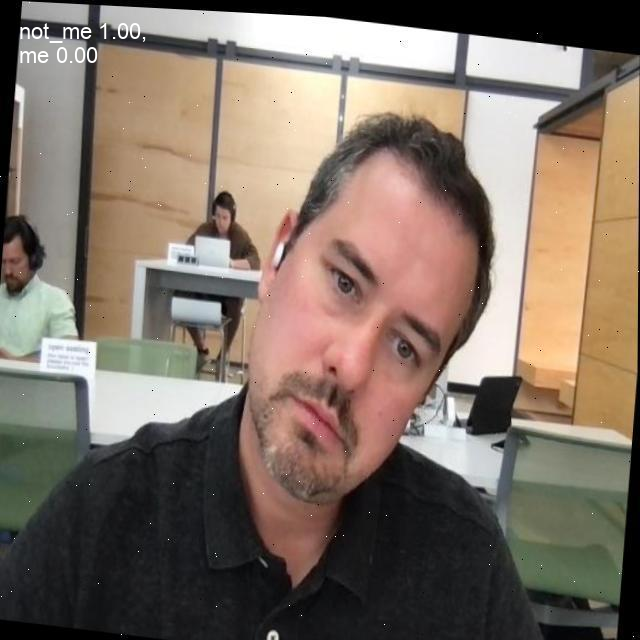

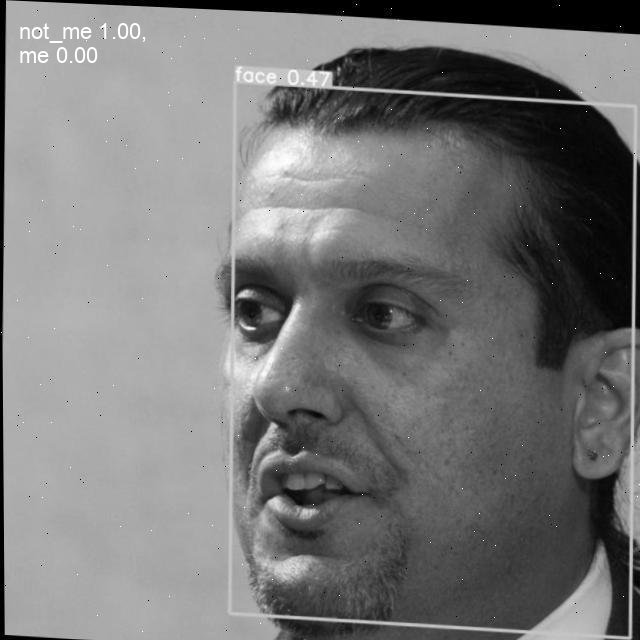

In [14]:
from ultralytics import YOLO
import glob
# Load a model
model = YOLO("/content/best.pt")  # pretrained YOLO11n model

images = glob.glob("/content/drive/MyDrive/kt/project_4/Datasets/YOLO/day2_datasets/test/not_me/*.jpg")
# Run batched inference on a list of images
results = model([images[0], images[1]])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="/content/drive/MyDrive/kt/project_4/Datasets/YOLO/result.jpg")  # save to disk

#### (4) UltraLytics YOLO-cls 모델 저장

* **세부 요구사항**
    - 모델을 **반드시** 저장하세요.
    - .pt 형태로 Colab에 저장이 될 것입니다. 해당 파일을 **로컬에 다운로드** 하세요.